In [78]:
from tensorflow.python.keras.saving.saved_model.load import models_lib

from get_keyword_textrank import df_total
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

,category,text,keyword,label
0,AS문의,네 많이 걱정하셨을 텐데요. 일단 기사가 다시 가서 확인을 좀 드릴거고요. 일정 확...,"[시간, 기사가, 연락]",고장신고
1,AS문의,반갑습니다 상담사 입니다. 다름이 아니고요 지난번에 냉장고를 고쳤거든요. 예 제...,"[알려주신, 휴대폰, 물이]",고장신고
2,AS문의,안녕하세요 세탁기 전문 상담사 입니다. 수고하십니다 세탁기 급수가 안 돼서 연락...,"[다시, 물이, 세탁기]",고장신고
3,AS문의,반갑습니다 상담사 입니다. 세탁기가요 세제하고 섬유 유연제가 세탁기 속으로 들어...,"[어떻게, 해주세요, 그렇게]",고장신고
4,AS문의,반갑습니다 상담사 입니다. 안녕하세요 노트북 을 사용 중인데요. 네 노트북 사용하세...,"[노트북, 센터, 상담]",고장신고
...,...,...,...,...
9059,환불/반품/교환,청명한 하루입니다 고객센터 상담사 입니다. 상담사님 안녕하세요 수고하십니다. 감...,"[예약, 입니다, 상담사]",해지
9060,환불/반품/교환,반갑습니다 입니다. 안녕하세요 가구 배송 희망일 선택 시 요일 선택도 가능한가요....,"[지방의, 배송, 경우에는]",해지
9061,환불/반품/교환,생산 업체로부터 부품 교체도 받으신 건이시구요. 예 그때 당시에 교체도 한 번 받았...,"[이게, 업체, 그러면]",해지
9062,환불/반품/교환,안녕하세요 상담사입니다. 수고하십니다 제가 받은 제품 덮개가 안 맞아요. 네 고...,"[덮개, 맞아요, 제품]",해지


In [77]:
print(df_total.isnull().sum())
print(len(df_total))

category    0
text        0
keyword     0
label       0
dtype: int64
9059


In [57]:
ohe = OneHotEncoder()
ohe.fit(df_total[['label']])
ohe_encoded = ohe.transform(df_total[['label']])
column_list = [name[6:] for name in ohe.get_feature_names_out()]
ohe_df = pd.DataFrame(ohe_encoded.toarray(), columns=column_list, index=df_total.index)
data = pd.concat([df_total, ohe_df], axis=1)
data

['label_가입문의' 'label_고장신고' 'label_서비스문의' 'label_요금문의' 'label_해지']
(9059, 5)
(9059, 5)
(9059, 5)


,category,text,keyword,label,가입문의,고장신고,서비스문의,요금문의,해지
0,AS문의,네 많이 걱정하셨을 텐데요. 일단 기사가 다시 가서 확인을 좀 드릴거고요. 일정 확...,"[시간, 기사가, 연락]",고장신고,0.0,1.0,0.0,0.0,0.0
1,AS문의,반갑습니다 상담사 입니다. 다름이 아니고요 지난번에 냉장고를 고쳤거든요. 예 제...,"[알려주신, 휴대폰, 물이]",고장신고,0.0,1.0,0.0,0.0,0.0
2,AS문의,안녕하세요 세탁기 전문 상담사 입니다. 수고하십니다 세탁기 급수가 안 돼서 연락...,"[다시, 물이, 세탁기]",고장신고,0.0,1.0,0.0,0.0,0.0
3,AS문의,반갑습니다 상담사 입니다. 세탁기가요 세제하고 섬유 유연제가 세탁기 속으로 들어...,"[어떻게, 해주세요, 그렇게]",고장신고,0.0,1.0,0.0,0.0,0.0
4,AS문의,반갑습니다 상담사 입니다. 안녕하세요 노트북 을 사용 중인데요. 네 노트북 사용하세...,"[노트북, 센터, 상담]",고장신고,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9059,환불/반품/교환,청명한 하루입니다 고객센터 상담사 입니다. 상담사님 안녕하세요 수고하십니다. 감...,"[예약, 입니다, 상담사]",해지,0.0,0.0,0.0,0.0,1.0
9060,환불/반품/교환,반갑습니다 입니다. 안녕하세요 가구 배송 희망일 선택 시 요일 선택도 가능한가요....,"[지방의, 배송, 경우에는]",해지,0.0,0.0,0.0,0.0,1.0
9061,환불/반품/교환,생산 업체로부터 부품 교체도 받으신 건이시구요. 예 그때 당시에 교체도 한 번 받았...,"[이게, 업체, 그러면]",해지,0.0,0.0,0.0,0.0,1.0
9062,환불/반품/교환,안녕하세요 상담사입니다. 수고하십니다 제가 받은 제품 덮개가 안 맞아요. 네 고...,"[덮개, 맞아요, 제품]",해지,0.0,0.0,0.0,0.0,1.0


TypeError: LogScale.__init__() got an unexpected keyword argument 'nonposy'

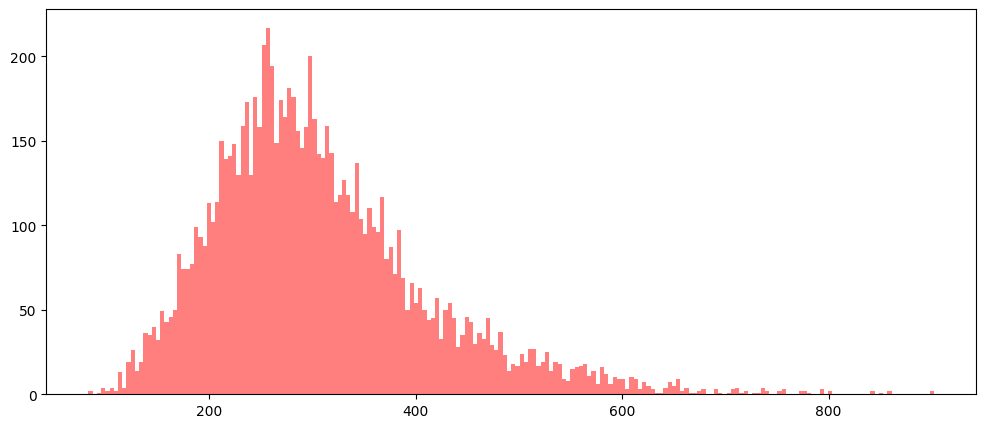

In [106]:
import matplotlib.pyplot as plt
train_length = data['text'].apply(len)

plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
# plt.yscale('log')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of text')
plt.xlabel('Length of text')
plt.ylabel('Number of text')

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from keras import utils
 
Y_obj = data['label']
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [83]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data.text)
Y_encoded = utils.to_categorical(Y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [86]:
np.shape(X)

(9059, 59897)

TypeError: 'tuple' object is not callable

In [89]:
from keras import models, layers

# 모델의 설정
model = models.Sequential()
model.add(layers.Input(shape=(100,)))
model.add(layers.Dense(30, activation = 'relu'))
model.add(layers.Dense(5, activation = 'softmax'))
 
# 모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

 # 모델 실행
model.fit(X, Y_encoded, epochs = 50, batch_size = 1)
 
# 결과 출력
print("\n Accuracy: %.4f" %(model.evaluate(X, Y_encoded)[1]))

Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 100, but received input with shape (1, 59897)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 59897), dtype=float32)
  • training=True
  • mask=None

In [ ]:
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [93]:
from sklearn.preprocessing import LabelEncoder

Y_obj = data['label']
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y

array([1, 1, 1, ..., 4, 4, 4])

In [94]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data.text)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7247, 59897) (1812, 59897) (7247,) (1812,)


In [98]:
LR = LogisticRegression(max_iter=10000, multi_class='ovr')
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

from sklearn import metrics

print(f'Accuracy of Logistic Regression: {metrics.accuracy_score(y_test, y_pred)}')
print(f'ROC-AUC score of Logistic Regression: {metrics.roc_auc_score(y_test, LR.predict_proba(x_test), multi_class="ovr", average="macro")}')

C:\Users\Admin\PycharmProjects\aicc_keyword\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of Logistic Regression: 0.8570640176600441
ROC-AUC score of Logistic Regression: 0.9696030871858822


In [104]:
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier(objective='multi:softprob', max_depth=7, alpha=0.6)
xgb_model = model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
xgb_y_pred_proba = xgb_model.predict_proba(x_test)
print(f'Accuracy of XGBoost Classifier : {metrics.accuracy_score(y_test, xgb_y_pred)}')
print(f'ROC-AUC score of XGBoost Classifier : {metrics.roc_auc_score(y_test, xgb_y_pred_proba, multi_class="ovr", average="macro")}')

Accuracy of XGBoost Classifier : 0.8730684326710817
ROC-AUC score of XGBoost Classifier : 0.9625675844087078
